# Citera-Project-Work-DM

## **Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

import warnings

warnings.filterwarnings("ignore")

random_state = 42

## **Data Loading**

The Kaggle competition gives out 2 datasets:
- `train.csv` to be used to train the models and find the best hyperparameters
- `test.csv`, which doesn't have the target column. From this dataset predictions have to be made and submitted in a separate file (to be evaluated and placed in the competition's leaderboard).

Since the aim of this project activity is to showcase the various topics learned during the course, only the data from the first file will be used.

In [2]:
train = pd.read_csv("./data/train.csv")

In [3]:
print("Rows: {} - Columns: {}".format(train.shape[0], train.shape[1]))

Rows: 20758 - Columns: 18


In [4]:
train.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

In [6]:
train.describe()

,id,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,20758.00000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000
mean,10378.50000,23.841804,1.700245,87.887768,2.445908,2.761332,2.029418,0.981747,0.616756
std,5992.46278,5.688072,0.087312,26.379443,0.533218,0.705375,0.608467,0.838302,0.602113
min,0.00000,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,5189.25000,20.000000,1.631856,66.000000,2.000000,3.000000,1.792022,0.008013,0.000000
50%,10378.50000,22.815416,1.700000,84.064875,2.393837,3.000000,2.000000,1.000000,0.573887
75%,15567.75000,26.000000,1.762887,111.600553,3.000000,3.000000,2.549617,1.587406,1.000000
max,20757.00000,61.000000,1.975663,165.057269,3.000000,4.000000,3.000000,3.000000,2.000000


Since the column `id` and the index of the dataframe have the same function, we drop the column `id` in both train set.

In [5]:
train.drop("id", axis=1, inplace=True)

In [22]:
print("Duplicated values: {}".format(train.duplicated().sum()))
print("Null values: {}".format(train.shape[0] - train.dropna().shape[0]))

Duplicated values: 0
Null values: 0


The dataset doesn't present any null or duplicate values.

### Description of the columns:
- `Gender`, `Age`, `Height`, `Weight` are physical attributes
- `family_history_with_overweight` points out to familiarity with obesity
- `FAVC`: Frequent consumption of high caloric food
- `FCVC`: - Frequency of consumption of vegetables
- `NCP`: Number of main meals
- `CAEC`: Consumption of food between meals
- `SMOKE`:  tobacco usage
- `CH20`: Consumption of water daily
- `SCC`: Calories consumption monitoring
- `FAF`: Physical activity frequency
- `TUE`: Time using technology devices
- `CALC`: Consumption of alcohol
- `MTRANS`: Transportation used

## **Data Visualization**

In [6]:
categorical_columns = [col for col in train.columns if train[col].dtype == "object"]
numerical_columns = [col for col in train.columns if train[col].dtype != "object"]

### Distribution of categorical columns

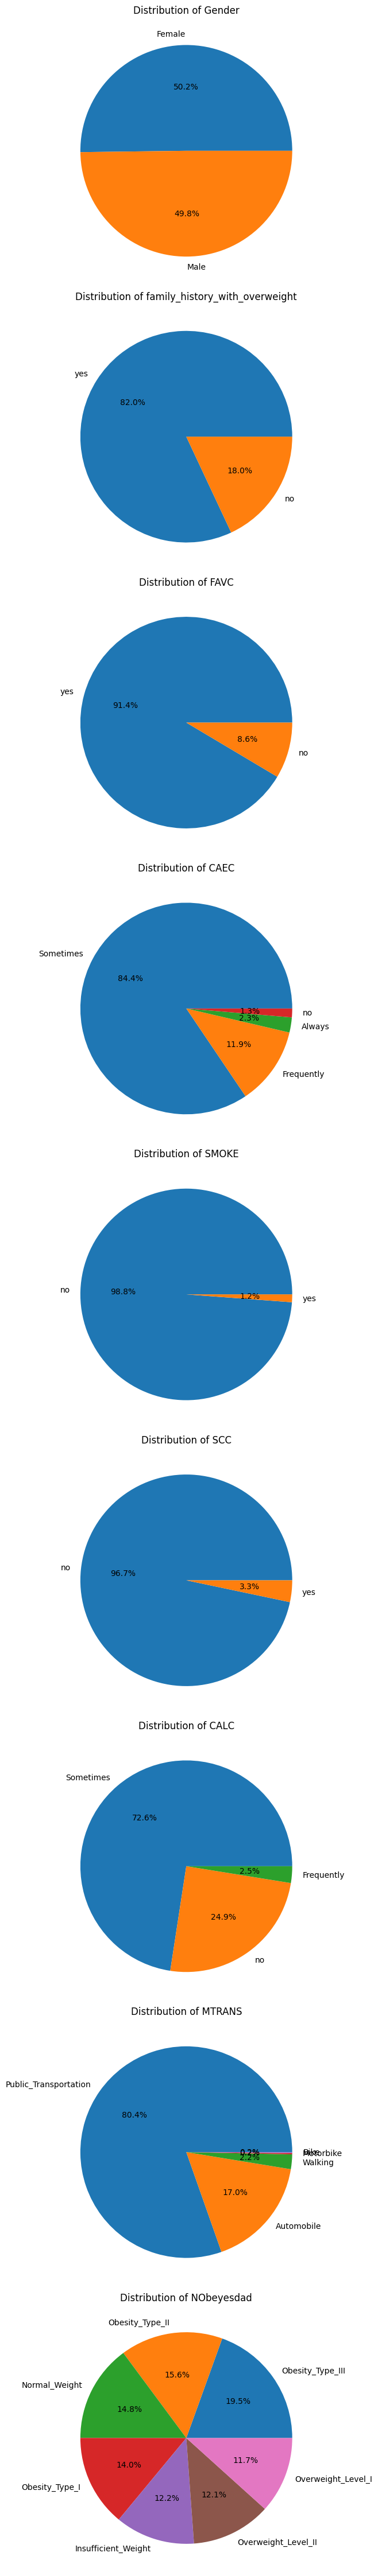

In [7]:
# Create subplots for each categorical column
fig, axes = plt.subplots(len(categorical_columns), figsize=(12, len(categorical_columns) * 5))

# Iterate through categorical columns
for idx, col in enumerate(categorical_columns):
    ax = axes[idx]

    # Extract value counts and labels
    value_counts = train[col].value_counts()
    labels = value_counts.index.to_numpy()

    # Create pie chart
    ax.pie(value_counts, labels=labels, autopct="%1.1f%%")

    # Set informative titles and labels
    ax.set_title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

**Analysis of Training Dataset:**
- `Gender`: The data shows a near-equal split between males and females.
- `Family History`: A significant portion (82.0%) of individuals have a family history of overweight.
- `High-calorie food consumption`:A high percentage (91.4%) frequently consume high-calorie food.
- `Snacking habits` reveal that 84.4% sometimes eat between meals, while only 1.5% report never doing so.
- `Smoking`: The data suggests an exceptionally low smoking rate, with 98.8% classified as non-smokers.
- `Calorie monitoring`: A large majority (96.7%) do not track their calorie intake.
- `Alcohol consumption`: While 72.6% report occasional alcohol consumption, only 2.5% do so frequently. Notably, the test data includes an "Always" category for alcohol intake.
- `Transportation`: Vehicle usage is prevalent, with 97.6% using some form of motorized transport. Only a small portion (2.4%) prefer walking or cycling.
- `Target variable` (*NObeyesdad*): The distribution of obesity types indicates a relatively even spread across all categories, with **Obesity_Type_III** having a slight lead (19.5%).

### Distribution of numerical columns

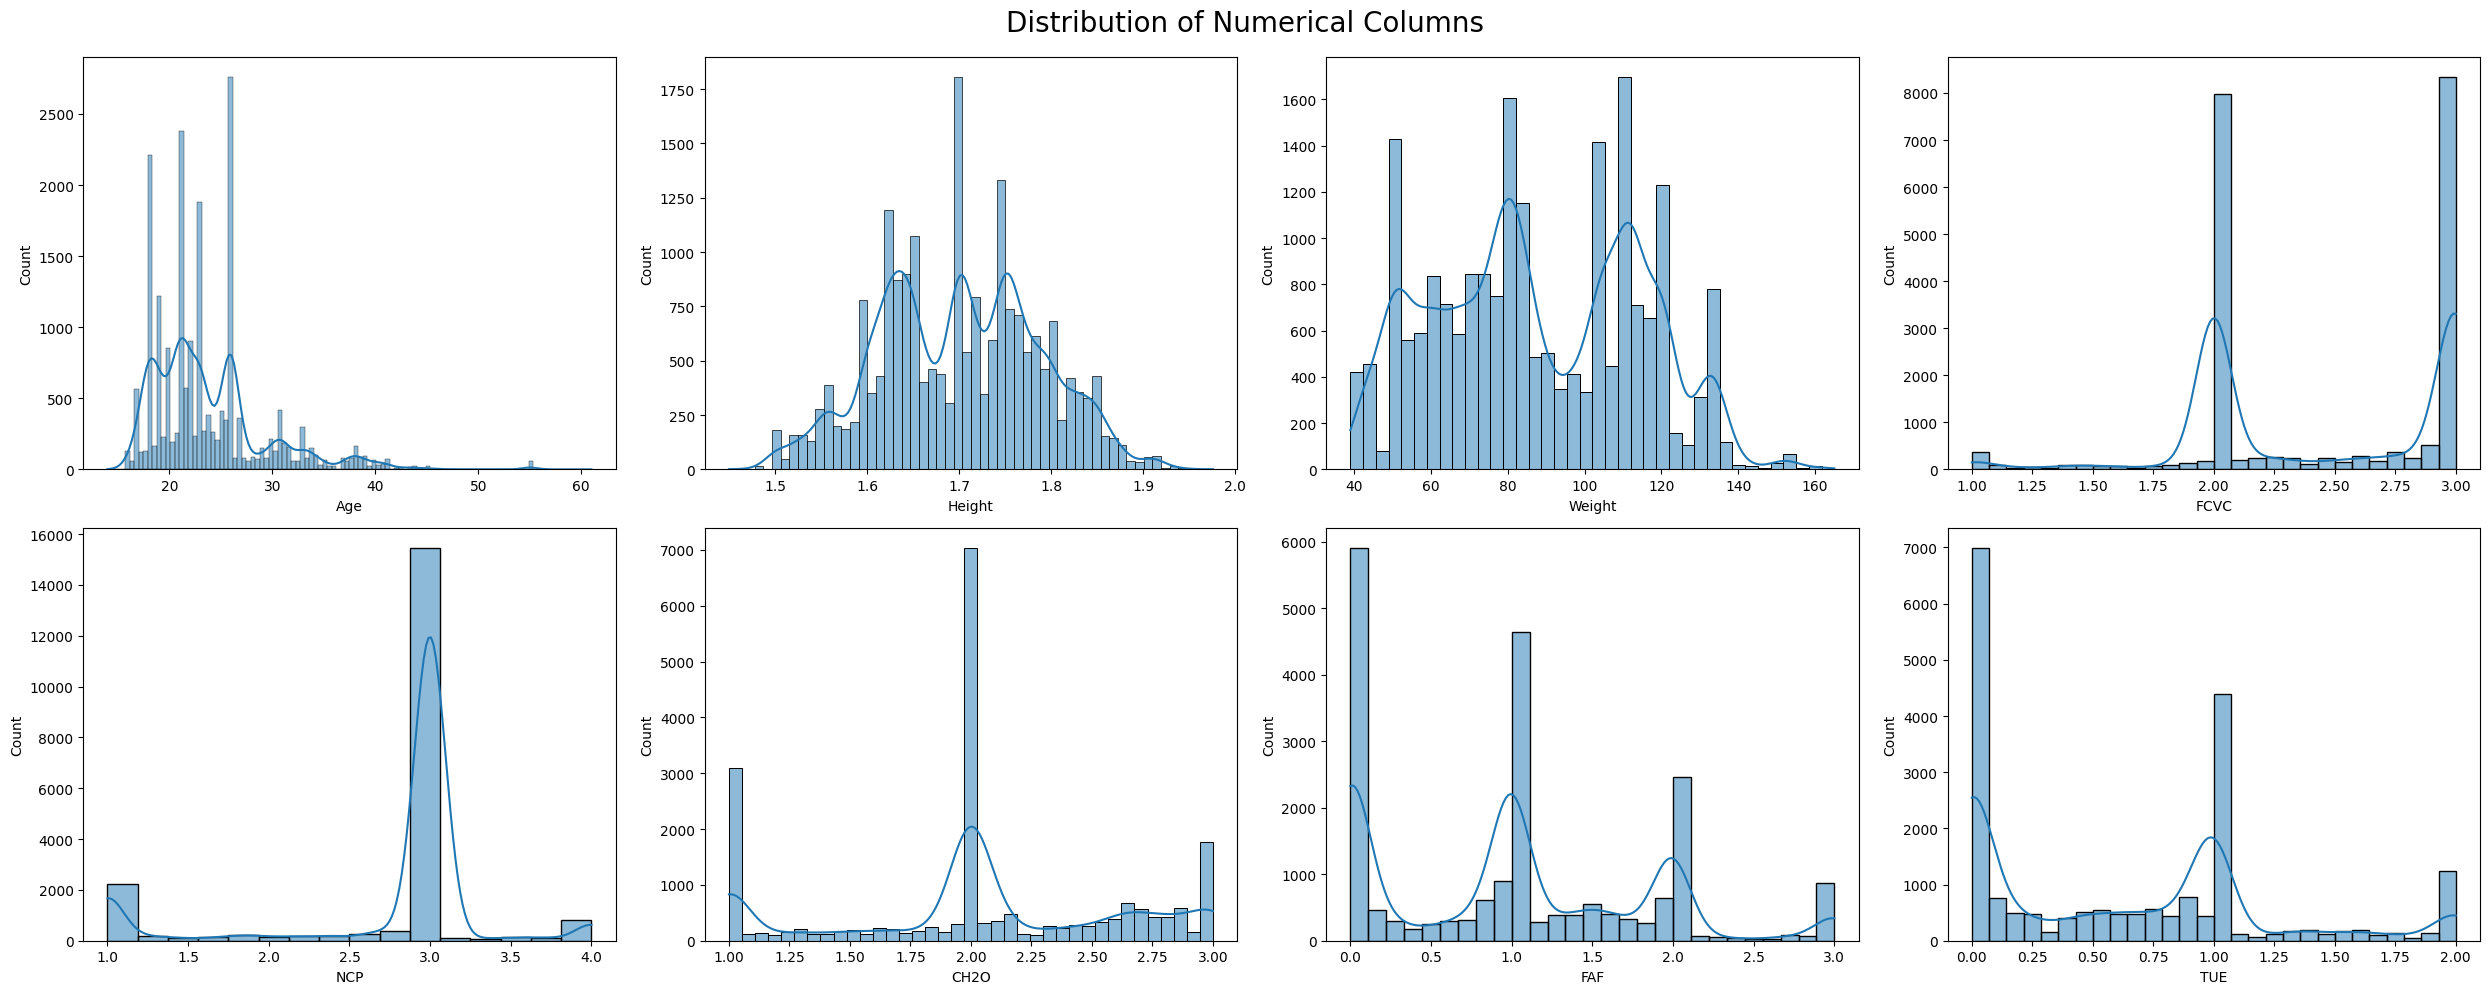

In [11]:
pos = 1
fig = plt.figure(figsize=(25, 10))
fig.suptitle("Distribution of Numerical Columns", y=0.99, fontsize=20)

for col in numerical_columns:
    plt.subplot(2, 4, pos)
    plt.xlabel(col)
    sns.histplot(train[col], kde=True)
    pos = pos + 1

plt.tight_layout()
plt.show()

Age, height and Weight are normally distributed with some skewness and some peaks, which are probably signs of the presence of outliers. RIVEDERE

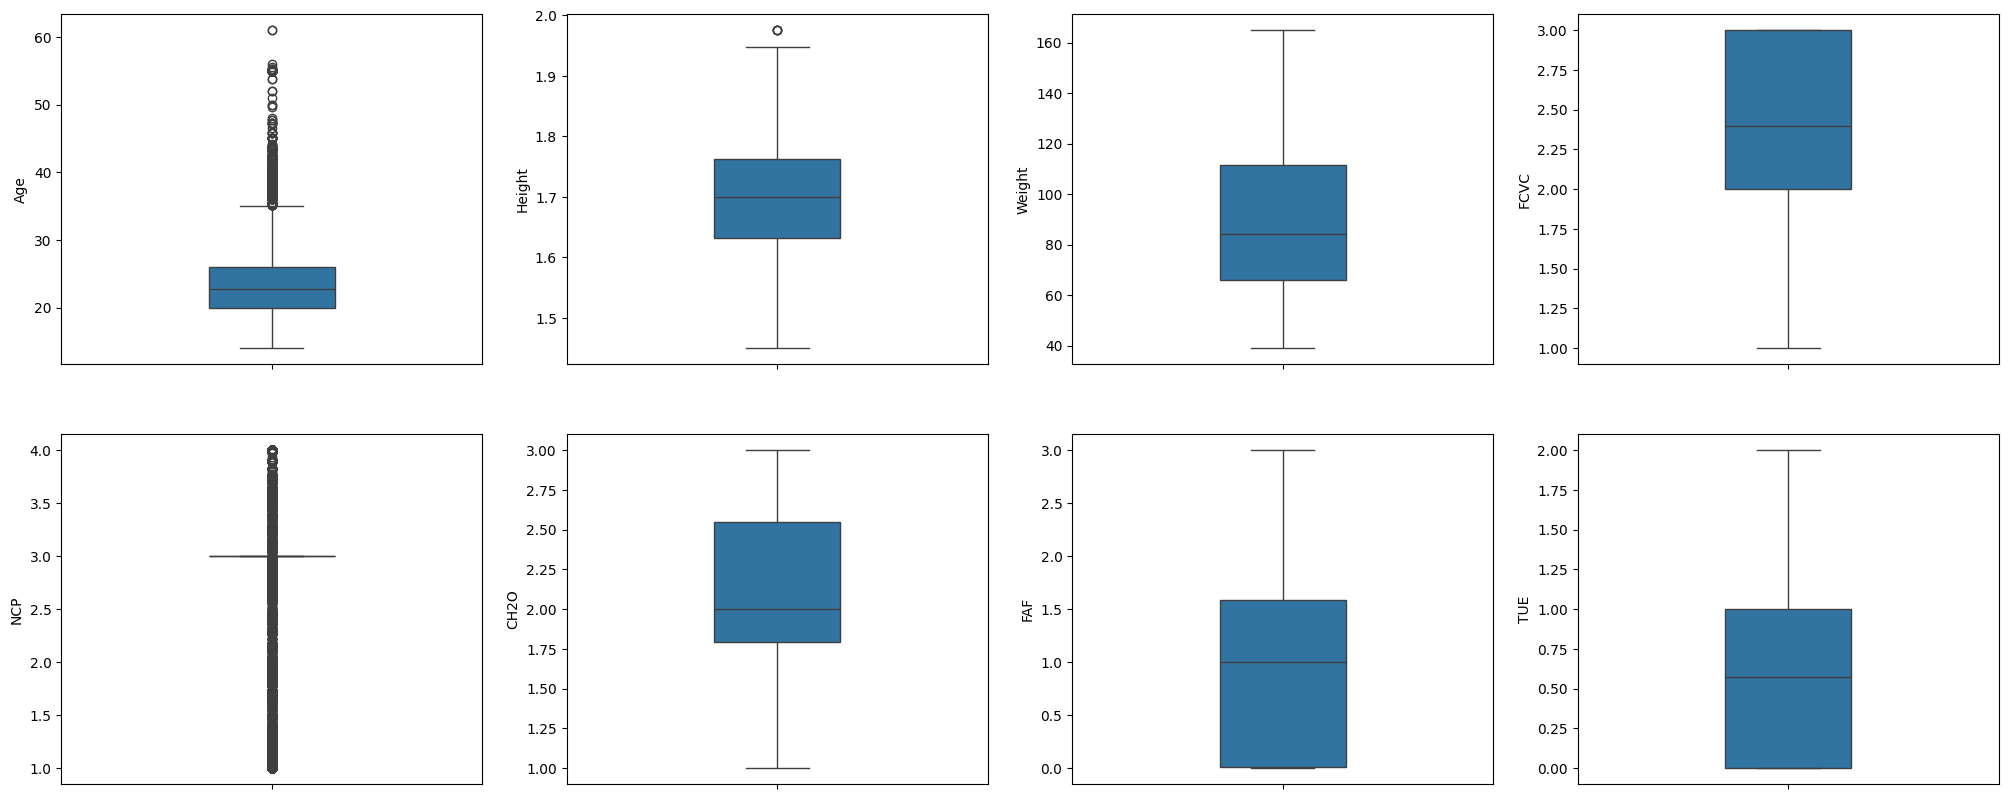

In [12]:
plt.figure(figsize=(25, 10))
for i, col in enumerate(numerical_columns):
    plt.subplot(2, 4, i + 1)
    sns.boxplot(data=train, y=col, width=0.3)
plt.show()

The only features that present outliers are Age, Height and NCP.

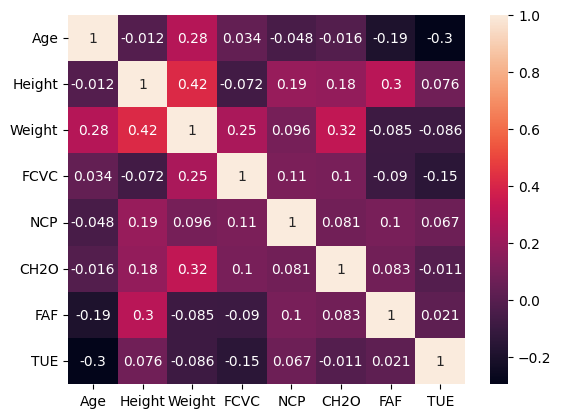

In [13]:
sns.heatmap(train[numerical_columns].corr(), annot=True)
plt.show()

In general all columns present pretty low correlation between each other.

### Feature engineering
BMI is often used as an indicator of obesity and it better represents the relationship between weight and height.

In [8]:
train["BMI"] = train["Weight"] / (train["Height"] ** 2)

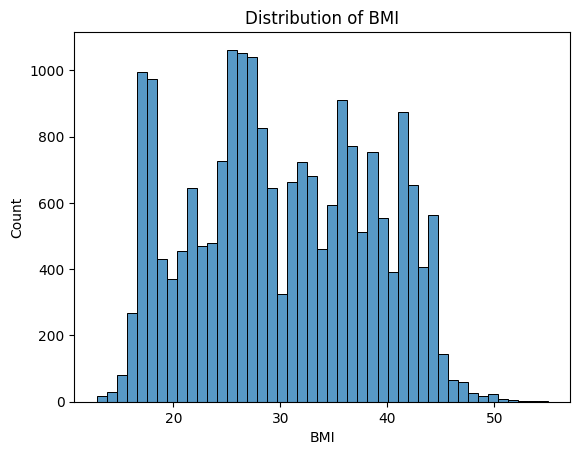

In [15]:
plt.title("Distribution of BMI")
sns.histplot(train["BMI"])
plt.show()

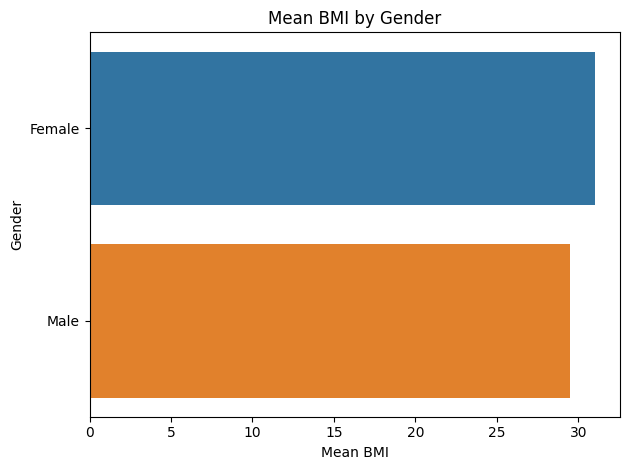

In [16]:
# Calculate mean BMI by gender
mean_bmi_by_gender = train.groupby("Gender")["BMI"].mean().reset_index()

sns.barplot(data=mean_bmi_by_gender, x="BMI", y="Gender", hue="Gender")

plt.xlabel("Mean BMI")
plt.ylabel("Gender")
plt.title("Mean BMI by Gender")

plt.tight_layout()
plt.show()

From this last plot, we can see that BMI doesn't really depend from gender, in fact in females and males we present similar values.

## **Data Preprocessing**

In [17]:
train[categorical_columns].nunique()

Gender                            2
family_history_with_overweight    2
FAVC                              2
CAEC                              4
SMOKE                             2
SCC                               2
CALC                              3
MTRANS                            5
NObeyesdad                        7
dtype: int64

In [9]:
ohe = OneHotEncoder(sparse_output=False, handle_unknown="ignore")
le = LabelEncoder()

# We take from the categorical columnns the ones that need OneHot Encoding (2 possible values)
one_hot_columns = ["Gender", "family_history_with_overweight", "FAVC", "SMOKE", "SCC"]

# We take from the categorical columnns the ones that need have more than 2 possible values
other_columns = ["CAEC", "CALC", "MTRANS"]

for col in one_hot_columns:
    train[col] = ohe.fit_transform(train[[col]])

for col in other_columns:
    train[col] = le.fit_transform(train[[col]])

train["NObeyesdad"] = le.fit_transform(train["NObeyesdad"])

We split the training test in **2 parts**: 
- **2/3** used for Cross Validation, which will be *X_train, y_train*, 
- **1/3** used for calculating the predictions, which will be *X_test, y_test*.

In [10]:
X = train.drop("NObeyesdad", axis=1)
y = train["NObeyesdad"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=(1 / 3), random_state=random_state)

In [11]:
std = StandardScaler()
X_train = std.fit_transform(X_train)
X_test = std.transform(X_test)

## **Modeling**

In order to get the best results for each model, I decided to perform **`Cross Validation`**.\
It consists in dividing the training set in **k folds**, the model is trained k times (*each time k-1 folds are used for training and 1 for validation*).\
At the end the average performance across all k iterations is estimated.\
It avoids overfitting and makes sure that the model's performance is not highly influenced by specific random split of data, which is good.

### Hyperparameters
Below are listed all the hyperparameters tested in the various ML models used. 

In [21]:
models = {
    "dt": {
        "name": "DecisionTree",
        "estimator": DecisionTreeClassifier(random_state=random_state),
        "params": [
            {
                "max_depth": [*range(1, 20)],
                "class_weight": [None, "balanced"],
                "criterion": ["gini", "entropy", "log_loss"],
                "splitter": ["best", "random"],
            }
        ],
    },
    "rf": {
        "name": "RandomForest",
        "estimator": RandomForestClassifier(random_state=random_state),
        "params": [
            {
                "max_depth": [*range(4, 30)],
                "n_estimators": [*range(10, 100, 10)],
                "n_jobs": [-1],
                "ccp_alpha": [0.0001],  # , 0.001, 0.01, 0.1, 1.0
                "max_leaf_nodes": [50, 100, 200],
                "criterion": ["gini", "entropy", "log_loss"],
            }
        ],
    },
    "lr": {
        "name": "LogisticRegression",
        "estimator": LogisticRegression(random_state=random_state),
        "params": [{"C": [0.1, 1.0], "penalty": ["l1", "l2"]}],
    },
    "ab": {
        "name": "AdaBoost",
        "estimator": AdaBoostClassifier(random_state=random_state),
        "params": [{"n_estimators": [*range(10, 100, 10)], "learning_rate": [0.2, 0.5, 0.75, 1, 1.25, 1.5]}],
    },
    "knn": {
        "name": "KNearestNeighbors",
        "estimator": KNeighborsClassifier(),
        "params": [
            {
                "n_neighbors": list(range(1, 20)),
                "weights": ["uniform", "distance"],
                "metric": ["cosine", "euclidean", "cityblock", "nan_euclidean", "minkowski"],
                "leaf_size": [10, 20, 30],
            }
        ],
    },
    "lp": {
        "name": "LinearPerceptron",
        "estimator": Perceptron(random_state=random_state),
        "params": [{"early_stopping": [True, False], "class_weight": [None, "balanced"]}],
    },
    "svm": {
        "name": "SVM",
        "estimator": SVC(random_state=random_state),
        "params": [
            {
                "kernel": ["rbf", "linear"],
                "gamma": [1e-3, 1e-4],
                "C": [*range(1, 100, 10)],
                "tol": [1e-5, 1e-4, 1e-3, 1e-2],
            }
        ],
    },
}

model_labels = ["dt", "rf", "lr", "ab", "knn", "lp", "svm"]

The function **training_function** performs a **GridSearch** on the assigned estimator (testing all the parameters for that model), it prints the **classification report** and the **confusion matrix** and saves the best parameters and the relative scorings in a dataframe (for later use).

In [22]:
# preparing the structures to contain the best classificator (with best hyperparameters), the predictions and the scorings for each model
clfs = []
y_preds = []
results = pd.DataFrame(
    columns=[
        "scoring",
        "model",
        "best_params",
        "accuracy",
        "precision_macro",
        "recall_macro",
        "f1_macro",
    ]
)


def training_function(model_label):
    """It takes in input the model label.
    It performs a GridSearch for the choosen model, then fitting and predictions.
    The results are stored in the designed dataframe and then the classification report is printed and the confusion matrix is displayed.
    """
    clf = GridSearchCV(
        estimator=models[model_label]["estimator"],
        param_grid=models[model_label]["params"],
        scoring="accuracy",
        return_train_score=False,
        cv=5,
        n_jobs=-1,
    )

    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    clfs.append(clf)
    y_preds.append(y_pred)
    cr = classification_report(
        y_test, y_pred, output_dict=True
    )  # output as dict in order to get the scorings and store them in the dataframe
    results.loc[len(results)] = [
        "accuracy",
        models[model_label]["name"],
        clf.best_params_,
        cr["accuracy"],
        cr["macro avg"]["precision"],
        cr["macro avg"]["recall"],
        cr["macro avg"]["f1-score"],
    ]

    print("MODEL: ", models[model_label]["name"])
    print("- Classification report:\n", classification_report(y_test, y_pred))
    print("- Confusion Matrix")

    cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
    disp.plot()
    plt.show()
    print("------------------------------")

MODEL:  DecisionTree
- Classification report:
               precision    recall  f1-score   support

           0       0.92      0.91      0.92       843
           1       0.82      0.84      0.83      1006
           2       0.87      0.80      0.83       957
           3       0.94      0.96      0.95      1101
           4       0.99      1.00      1.00      1351
           5       0.71      0.73      0.72       804
           6       0.73      0.77      0.75       858

    accuracy                           0.87      6920
   macro avg       0.86      0.86      0.86      6920
weighted avg       0.87      0.87      0.87      6920

- Confusion Matrix


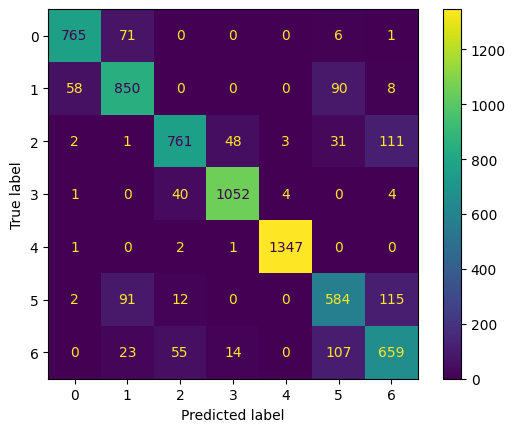

------------------------------
MODEL:  RandomForest
- Classification report:
               precision    recall  f1-score   support

           0       0.92      0.91      0.92       843
           1       0.84      0.87      0.85      1006
           2       0.87      0.85      0.86       957
           3       0.96      0.98      0.97      1101
           4       1.00      1.00      1.00      1351
           5       0.77      0.76      0.76       804
           6       0.78      0.77      0.78       858

    accuracy                           0.89      6920
   macro avg       0.88      0.88      0.88      6920
weighted avg       0.89      0.89      0.89      6920

- Confusion Matrix


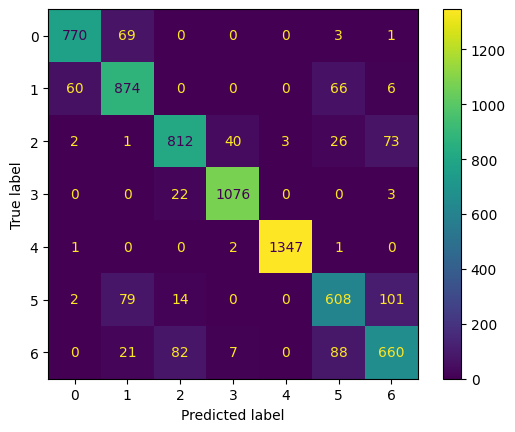

------------------------------
MODEL:  LogisticRegression
- Classification report:
               precision    recall  f1-score   support

           0       0.88      0.93      0.91       843
           1       0.85      0.80      0.82      1006
           2       0.82      0.83      0.83       957
           3       0.94      0.97      0.96      1101
           4       1.00      1.00      1.00      1351
           5       0.70      0.72      0.71       804
           6       0.72      0.68      0.70       858

    accuracy                           0.86      6920
   macro avg       0.85      0.85      0.85      6920
weighted avg       0.86      0.86      0.86      6920

- Confusion Matrix


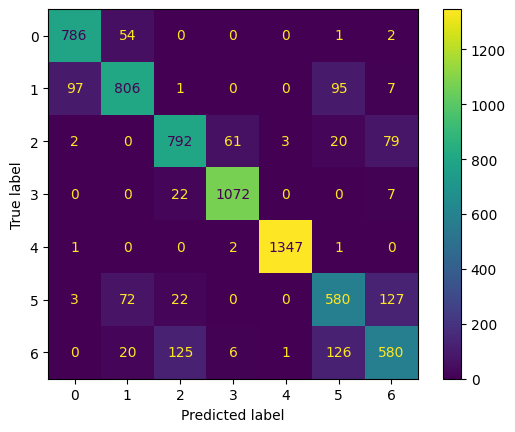

------------------------------
MODEL:  AdaBoost
- Classification report:
               precision    recall  f1-score   support

           0       0.66      0.16      0.25       843
           1       0.50      0.86      0.63      1006
           2       0.75      0.28      0.41       957
           3       0.63      0.91      0.74      1101
           4       0.93      1.00      0.96      1351
           5       0.74      0.55      0.63       804
           6       0.65      0.75      0.70       858

    accuracy                           0.68      6920
   macro avg       0.69      0.64      0.62      6920
weighted avg       0.70      0.68      0.64      6920

- Confusion Matrix


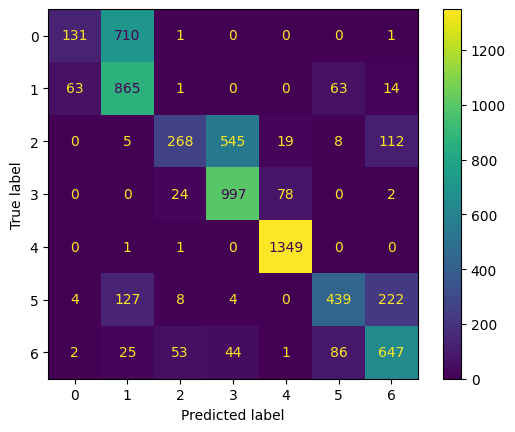

------------------------------
MODEL:  KNearestNeighbors
- Classification report:
               precision    recall  f1-score   support

           0       0.88      0.86      0.87       843
           1       0.69      0.77      0.73      1006
           2       0.82      0.80      0.81       957
           3       0.94      0.96      0.95      1101
           4       0.99      1.00      0.99      1351
           5       0.66      0.57      0.61       804
           6       0.69      0.69      0.69       858

    accuracy                           0.83      6920
   macro avg       0.81      0.81      0.81      6920
weighted avg       0.83      0.83      0.83      6920

- Confusion Matrix


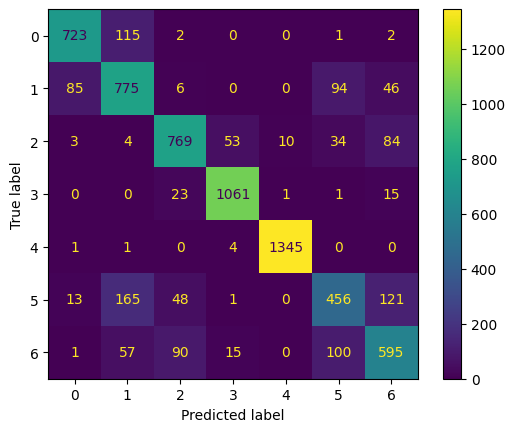

------------------------------
MODEL:  LinearPerceptron
- Classification report:
               precision    recall  f1-score   support

           0       0.90      0.64      0.75       843
           1       0.50      0.52      0.51      1006
           2       0.62      0.40      0.49       957
           3       0.89      0.90      0.90      1101
           4       0.99      0.98      0.98      1351
           5       0.29      0.54      0.38       804
           6       0.31      0.27      0.29       858

    accuracy                           0.64      6920
   macro avg       0.64      0.61      0.61      6920
weighted avg       0.68      0.64      0.65      6920

- Confusion Matrix


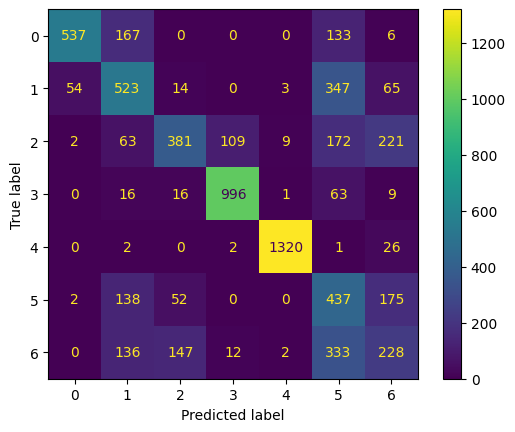

------------------------------
MODEL:  SVM
- Classification report:
               precision    recall  f1-score   support

           0       0.89      0.94      0.91       843
           1       0.86      0.81      0.84      1006
           2       0.85      0.85      0.85       957
           3       0.95      0.98      0.96      1101
           4       1.00      1.00      1.00      1351
           5       0.72      0.75      0.74       804
           6       0.75      0.72      0.73       858

    accuracy                           0.88      6920
   macro avg       0.86      0.86      0.86      6920
weighted avg       0.88      0.88      0.87      6920

- Confusion Matrix


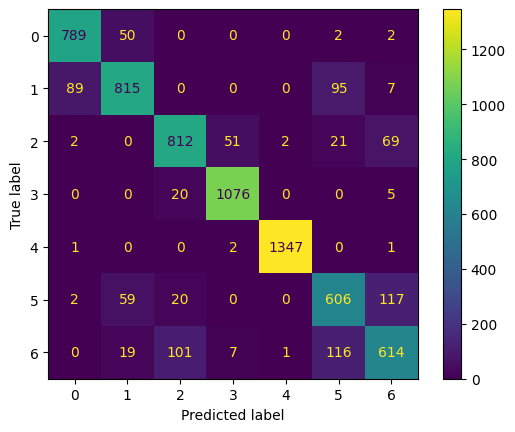

------------------------------


In [23]:
# for each model we perform the training to see which one gives the best scores
for model_label in model_labels:

    training_function(model_label)

In [24]:
# sorting the results by accuracy in order to see what performs better
results.sort_values(by="accuracy", ascending=False).head(10)

,scoring,model,best_params,accuracy,precision_macro,recall_macro,f1_macro
1,accuracy,RandomForest,"{'ccp_alpha': 0.0001, 'criterion': 'gini', 'ma...",0.888295,0.876618,0.875780,0.876099
6,accuracy,SVM,"{'C': 81, 'gamma': 0.001, 'kernel': 'rbf', 'to...",0.875578,0.861374,0.862607,0.861641
0,accuracy,DecisionTree,"{'class_weight': 'balanced', 'criterion': 'ent...",0.869653,0.857727,0.856366,0.856673
2,accuracy,LogisticRegression,"{'C': 1.0, 'penalty': 'l2'}",0.861705,0.845509,0.847035,0.845919
4,accuracy,KNearestNeighbors,"{'leaf_size': 10, 'metric': 'cityblock', 'n_ne...",0.827168,0.810092,0.807350,0.807828
3,accuracy,AdaBoost,"{'learning_rate': 0.75, 'n_estimators': 20}",0.678613,0.693019,0.642777,0.617233
5,accuracy,LinearPerceptron,"{'class_weight': 'balanced', 'early_stopping':...",0.639017,0.644692,0.606566,0.613161


We evaluated 7 machine learning models. In general they **all behaved above average**, but 5 performed better than the last 2.\
From the various outputs showed above, we can see that 5 models - RandomForest, SVM, DecisionTree, LogisticRegression, and KNN - performed very well, returning above 80% across all evaluation metrics, with **`the best one`** being **`RandomForest`** with a **`88% of accuracy`**.\
The last two models - AdaBoost and LinearPerceptron - returned worse results, but still over 60% in all performance metrics. 

In [25]:
# saving the results in .csv file for later use
results.to_csv("./data/results.csv")

To complete Kaggle competition, the next step would be loading the data from the `test.csv` given and perform the encoding and preprocessing techniques used on the previous data. The data has all the columns except for the target, which must be calculated - using the best model and its best hyperparameters - and submitted in order to be evaluated and placed in the leaderboard.